https://drive.google.com/drive/u/0/folders/1D4ifn_scE2ATOKc4GCrm227Toi8_hWKa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization function for better representation of matrix values
def plot_matrix_with_values(matrix, title='Matrix'):
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='red', fontsize=8)
    plt.title(title)
    plt.colorbar()
    plt.show()

ReLU Activation Function
The ReLU function is one of the most commonly used activation functions in deep learning models. It replaces all negative values in the input matrix with zero, while keeping the positive values unchanged.

ReLU is employed to introduce non-linearity into the model, which is critical for the network to learn complex patterns in data.
The function uses np.maximum(0, x) to ensure that any negative values in x are replaced with 0.
This is an element-wise operation that is very computationally efficient. ReLU helps prevent the vanishing gradient problem, allowing for faster learning in deep neural networks.


---
The Convolutional Layer is the backbone of a CNN, responsible for detecting patterns such as edges, textures, and other important features from input images or feature maps.

Attributes:

name: A string that gives a unique name to the layer.
in_channels: The number of channels in the input.
out_channels: The number of filters or kernels (feature detectors).
kernel_size: Size of the kernel/filter.
stride: The step size for sliding the kernel across the input.
padding: Padding applied around the input.

The convolution layer applies multiple filters to an input matrix (image or feature map) to extract features such as edges, corners, or textures.
t slides the kernel/filter across the input image with a defined stride.
It computes the dot product between the filter and the input region, adds a bias term, and stores the result.
Padding is added to ensure that the spatial dimensions of the output feature map are controlled.
This implementation ensures efficient matrix multiplication with np.tensordot. Padding and stride allow flexibility in the output dimensions.


---

Max pooling is a down-sampling operation commonly used in CNNs to reduce the spatial dimensions of the feature map, thus reducing computation and overfitting.

Attributes:

name: The name of the layer.
pool_size: The size of the pooling window (default is 2).
stride: Step size for sliding the pooling window (default is 2).

Max pooling reduces the spatial dimensions (height and width) of the input feature map while retaining the most important features (the maximum value in each region).
It slides a window of size pool_size across the input with a stride of stride.
For each region, it selects the maximum value and stores it in the output.
Max pooling helps reduce computation, memory usage, and overfitting by making the feature maps more abstract.



---
Average pooling works similarly to max pooling, but instead of taking the maximum value, it computes the average of each region.

Attributes:

name: The name of the layer.
pool_size: The size of the pooling window (default is 2).
stride: Step size for sliding the pooling window (default is 2).

Average pooling provides a form of down-sampling that helps reduce the spatial size while capturing the average features within each region.
It slides the pooling window across the input, computes the mean of each region, and stores the result in the output.
Like max pooling, average pooling reduces computation and overfitting but provides a smoother representation of features.


---


A Residual Block adds a skip connection (or shortcut connection) to the network. The idea is to add the input of the block to the output of the block after it has been processed (via convolution, activation, etc.). This helps avoid vanishing gradients by allowing the gradient to flow directly through the shortcut connection.

Attributes:

name: The name of the residual block.

The residual block enables deeper networks by allowing the gradient to flow through skip connections. It makes the learning process more efficient by preventing vanishing gradients.
The input and residual are added element-wise.
ReLU activation is applied to the sum to introduce non-linearity.
Skip connections improve convergence in deep networks by allowing gradients to propagate more easily.

In [5]:
# ReLU Activation
def relu(x):
    """
    Applies the ReLU activation function to a given input matrix.
    Task:
    - Replace all negative values in the input matrix with 0.
    """
    return np.maximum(0, x)

    # Implement ReLU logic here.

# Convolutional Layer
class Convolutional:
    """
    Represents a convolutional layer with optional padding and stride.

    Attributes:
    - name (str): The name of the layer (e.g., 'conv1').
    - kernel (np.ndarray): The filter to convolve with.
    - stride (int): Step size for sliding the kernel.
    - padding (int): Padding to apply around the input.

    Methods:
    - forward(input): Computes the convolution operation on the input matrix.
    """

    def __init__(self, in_channels: int, out_channels: int, kernel_size: int, stride: int = 1, padding: int = 0, name: str = "conv1"):
        """
        Initializes the convolutional layer.
        """
        self.name = name
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

        # Initialize weights and biases
        self.kernel = 0.1 * np.random.randn(out_channels, in_channels, kernel_size, kernel_size)
        self.bias = np.zeros((out_channels, 1))

    def forward(self, inp: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the convolution operation.
        """
        self.inp = inp
        batch_size, in_channels, height, width = inp.shape
        assert in_channels == self.in_channels, "Input channels must match."

        # Apply padding if needed
        if self.padding > 0:
            inp = np.pad(inp, ((0,), (0,), (self.padding,), (self.padding,)), mode='constant', constant_values=0)

        # Output dimensions
        out_height = (height - self.kernel_size + 2 * self.padding) // self.stride + 1
        out_width = (width - self.kernel_size + 2 * self.padding) // self.stride + 1
        self.out = np.zeros((batch_size, self.out_channels, out_height, out_width))

        # Convolution operation
        for i in range(out_height):
            for j in range(out_width):
                region = inp[:, :, i*self.stride:i*self.stride+self.kernel_size, j*self.stride:j*self.stride+self.kernel_size]
                self.out[:, :, i, j] = np.tensordot(region, self.kernel, axes=([1, 2, 3], [1, 2, 3])) + self.bias.T

        return self.out

# Max Pooling Layer
class MaxPoolingLayer:
    """
    Represents a max pooling layer.

    Attributes:
    - name (str): The name of the layer (e.g., 'pool1').
    - pool_size (int): The size of the pooling window.
    - stride (int): Step size for sliding the pooling window.

    Methods:
    - forward(input): Applies max pooling to the input matrix.
    """
    def __init__(self, pool_size: int = 2, stride: int = 2, name: str = "pool1"):
        """
        Initializes the max pooling layer.
        """
        self.name = name
        self.pool_size = pool_size
        self.stride = stride

    def forward(self, inp: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the max pooling operation.
        """
        self.inp = inp
        batch_size, channels, height, width = inp.shape

        # Calculate output dimensions
        out_height = (height - self.pool_size) // self.stride + 1
        out_width = (width - self.pool_size) // self.stride + 1
        self.out = np.zeros((batch_size, channels, out_height, out_width))

        # Max pooling operation
        for i in range(out_height):
            for j in range(out_width):
                region = inp[:, :, i*self.stride:i*self.stride+self.pool_size, j*self.stride:j*self.stride+self.pool_size]
                self.out[:, :, i, j] = np.max(region, axis=(2, 3))  # Find max in each region

        return self.out

# Average Pooling Layer
class AveragePoolingLayer:
    """
    Represents an average pooling layer.

    Attributes:
    - name (str): The name of the layer (e.g., 'pool1_avg').
    - pool_size (int): The size of the pooling window.
    - stride (int): Step size for sliding the pooling window.

    Methods:
    - forward(input): Applies average pooling to the input matrix.
    """
    def __init__(self, pool_size: int = 2, stride: int = 2, name: str = "pool1_avg"):
        """
        Initializes the average pooling layer.
        """
        self.name = name
        self.pool_size = pool_size
        self.stride = stride

    def forward(self, inp: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the average pooling operation.
        """
        self.inp = inp
        batch_size, channels, height, width = inp.shape

        # Calculate output dimensions
        out_height = (height - self.pool_size) // self.stride + 1
        out_width = (width - self.pool_size) // self.stride + 1
        self.out = np.zeros((batch_size, channels, out_height, out_width))

        # Average pooling operation
        for i in range(out_height):
            for j in range(out_width):
                region = inp[:, :, i*self.stride:i*self.stride+self.pool_size, j*self.stride:j*self.stride+self.pool_size]
                self.out[:, :, i, j] = np.mean(region, axis=(2, 3))  # Calculate the mean of each region

        return self.out

# Residual Block
class ResidualBlock:
    """
    Represents a residual block that implements skip connections.

    Attributes:
    - name (str): The name of the block (e.g., 'residual1').

    Methods:
    - forward(input, residual): Adds the input and residual matrices element-wise and applies ReLU activation.
    """
    def __init__(self, name: str = 'residual1'):
        """
        Initializes the residual block.
        Task:
        - Store the name of the block.
        """
        self.name = name

    def forward(self, inp: np.ndarray, residual: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the residual block.
        Task:
        - Add the input matrix and the residual matrix element-wise.
        - Apply the ReLU activation function to the result.
        - Return the resulting matrix.
        """
        # Ensure the input and residual have the same shape
        if inp.shape != residual.shape:
            raise ValueError("Input and residual must have the same shape.")

        # Element-wise addition of input and residual
        out = inp + residual

        # Apply ReLU activation function
        out = np.maximum(0, out)  # ReLU activation: max(0, x)

        return out

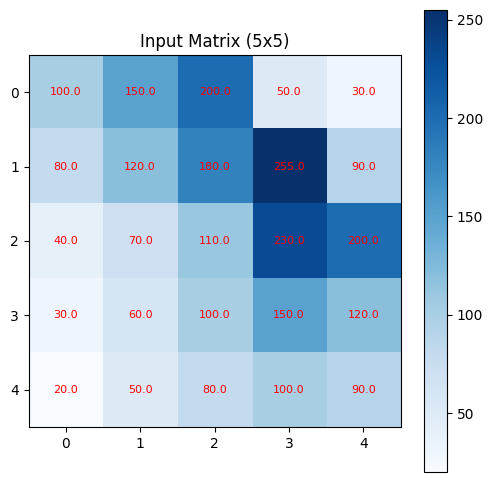

In [6]:
# Step 0: Define the Input Matrix
# Use this fixed 5x5 input matrix for all your calculations to ensure consistent results.
test_input = np.array([[100, 150, 200, 50, 30],
                       [80, 120, 180, 255, 90],
                       [40, 70, 110, 230, 200],
                       [30, 60, 100, 150, 120],
                       [20, 50, 80, 100, 90]])
plot_matrix_with_values(test_input, "Input Matrix (5x5)")

# Step 1: Convolution
# Fixed 3x3 Convolutional Filter (Kernel) to be used
conv_filter = np.array([[0.1, -0.2, 0.1],
                        [-0.3, 0.4, 0.1],
                        [0.2, -0.5, 0.1]])


You are tasked with implementing a simplified forward pass of a convolutional neural network (CNN) that includes a residual block. The steps include performing a convolution operation with the given filter, applying the ReLU function to the convolution output, adding a skip connection (residual addition) with the original input, performing 2×2 max pooling, and finally applying global average pooling to obtain a single scalar value. The resulting images at each step are provided to allow you to compare your outputs with the expected results.

This section demonstrates how a convolutional operation and a ReLU activation function are applied to a small input matrix using a convolutional layer and the relu function. The results are visualized to demonstrate the transformation of the input through each stage. Here’s a breakdown of each component:

1. Input Preparation
The input matrix is reshaped for compatibility with the convolutional layer. The reshaped input has dimensions (1, 1, 5, 5), which can be described as:

1 batch size
1 input channel (grayscale image)
5x5 spatial size (height x width)


2. Convolutional Layer Initialization
A convolutional layer object is created with the following parameters:

in_channels: 1 (indicating 1 input channel, such as a grayscale image).
out_channels: 1 (indicating that we will produce a single output channel).
kernel_size: 3 (indicating a 3x3 filter or kernel).
stride: 1 (indicating the kernel will move one step at a time across the input matrix).
padding: 1 (padding is added to the input to keep the output size the same as the input size).

3. Setting the Convolutional Kernel
The kernel (filter) is set explicitly from a previously defined conv_filter, which is reshaped to the required dimensions for the convolution layer (1, 1, 3, 3). This ensures that the kernel will be a 3x3 matrix for a single input channel and a single output channel.

4. Forward Pass Through Convolutional Layer
The forward pass applies the convolution operation using the defined kernel and the input matrix. This step involves sliding the kernel across the input matrix, computing the dot product of the kernel and the input region, and adding a bias term (if applicable).


5. ReLU Activation
The ReLU activation function is applied to the output of the convolutional layer. This operation replaces all negative values in the output matrix with 0, leaving positive values unchanged. The ReLU function introduces non-linearity, which helps the network learn more complex patterns.

6. Visualization
Both the convolution output and ReLU output are plotted using plot_matrix_with_values. This function visualizes the values in the 5x5 output matrices of both the convolutional and activation stages.

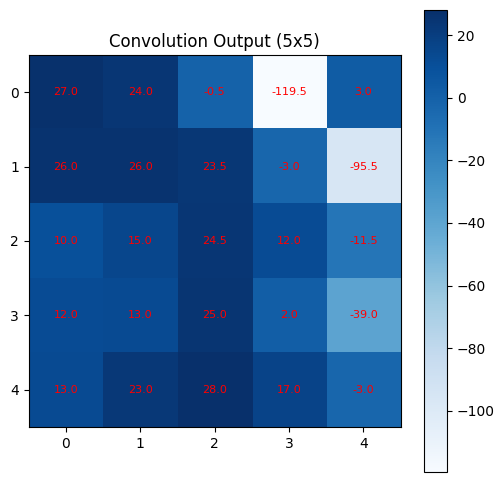

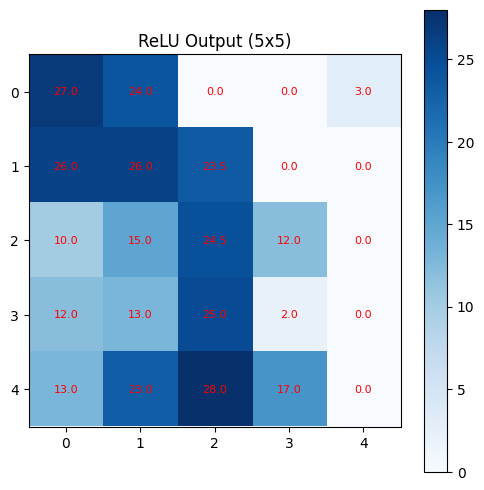

In [18]:

test_input_reshaped = test_input.reshape(1, 1, 5, 5)

conv_layer = Convolutional(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
conv_layer.kernel = conv_filter.reshape(1, 1, 3, 3)

conv_output = conv_layer.forward(test_input_reshaped)
plot_matrix_with_values(conv_output[0, 0], "Convolution Output (5x5)")
relu_output = relu(conv_output)
plot_matrix_with_values(relu_output[0, 0], "ReLU Output (5x5)")



Residual Addition: The original input is added element-wise to the ReLU output of the convolutional layer.

ReLU Activation: After addition, the ReLU activation is applied, replacing negative values with zero, allowing non-linearity.

Visualization: The resulting output is plotted using plot_matrix_with_values.

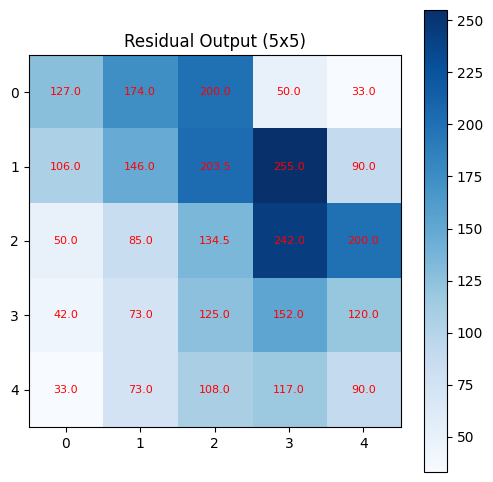

In [19]:

residual_output = ResidualBlock().forward(relu_output, test_input_reshaped.reshape(1, 1, 5, 5))
plot_matrix_with_values(residual_output[0, 0], "Residual Output (5x5)")



Max Pooling: A 2x2 pooling window is applied with a stride of 2, which reduces the dimensions of the input matrix by half.

Downsampling: The maximum value in each 2x2 window of the residual_output is selected, producing a smaller matrix.

Visualization: The resulting downsampled output is plotted using plot_matrix_with_values.

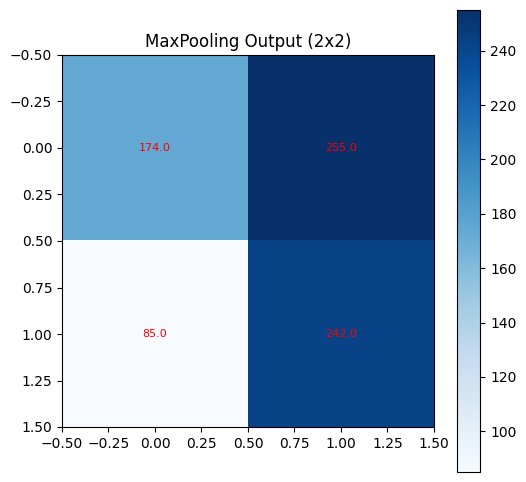

In [20]:
max_pooling = MaxPoolingLayer(pool_size=2, stride=2)
max_pooling_output = max_pooling.forward(residual_output)
plot_matrix_with_values(max_pooling_output[0, 0], "MaxPooling Output (2x2)")



Average Pooling: A 2x2 pooling window with a stride of 2 is applied to the input from the max pooling layer.

Downsampling: For each 2x2 window in the input matrix, the average value is computed and used to generate a smaller output matrix.

Visualization: The resulting averaged output is plotted using plot_matrix_with_values.

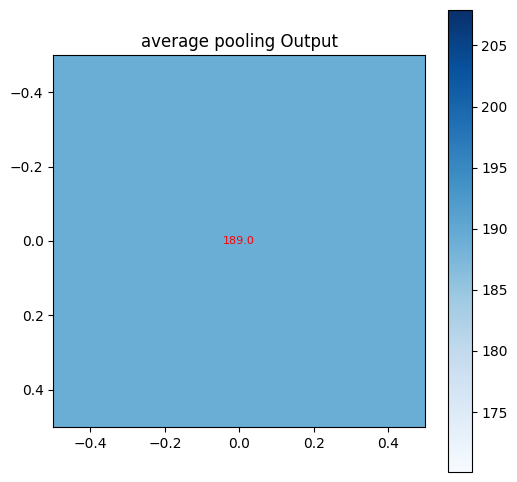

In [21]:
global_avg_pooling = AveragePoolingLayer(pool_size=2, stride=2)
global_avg_pooling_output = global_avg_pooling.forward(max_pooling_output)
plot_matrix_with_values(global_avg_pooling_output[0, 0], "average pooling Output")
